(512, 512)


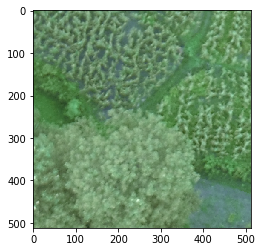

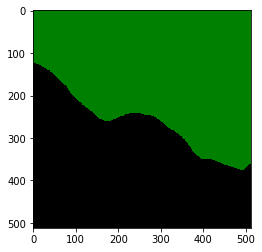

In [2]:
import argparse
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pdb
from PIL import Image
from scipy.io import loadmat
from torch.autograd import Variable
from torchvision import transforms
import torchvision
from glob import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline



os.environ["CUDA_VISIBLE_DEVICES"]='2'
model=torchvision.models.segmentation.deeplabv3_resnet50(pretrained=False, progress=True, num_classes=5, aux_loss=True)
# model=ResNetUNet(4)
# model=AttU_Net(img_ch=3,output_ch=4)


model = model.cuda()
model.eval()
checkpoint = torch.load('../data/model_focalloss_loav/best_deeplabv3_crops_epoch20.pth')
state_dict = {k[7:]: v for k, v in checkpoint['state_dict'].items() if 'tracked' not in k}
model.load_state_dict(state_dict)
cmap = loadmat('/data/jh/notebooks/lijingyuan/deeplabv3/DeepLabv3.pytorch/data/pascal_seg_colormap.mat')['colormap']
cmap = (cmap * 255).astype(np.uint8).flatten().tolist()

img=cv2.imread('../data/test_B/image4/img4_17_10.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

data_transforms = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
inputs = data_transforms(img)

inputs = Variable(inputs.cuda())
outputs = model(inputs.unsqueeze(0))
_, pred = torch.max(outputs["out"], 1)
pred = pred.data.cpu().numpy().squeeze().astype(np.uint8)
mask_pred = Image.fromarray(pred)
mask_pred.putpalette(cmap)

plt.figure(1)
plt.imshow(img)
plt.figure(2)
plt.imshow(mask_pred)
print(mask_pred.size)

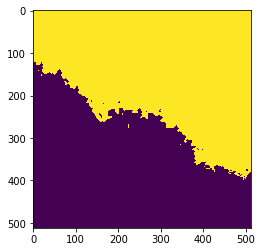

In [3]:
#crf后处理
from post_crf import *
MAP = do_crf(img, pred, zero_unsure=False)
plt.imshow(MAP)

In [4]:
MAP

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])